# To-Do's

- [ ] Decide on color palette and apply to all visualisations
- [ ] Add text explanations for each section
- [ ] Outline visuals for last 2 sections

# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import re

# Data prep

## Import data

In [2]:
## Import crime data from Politie
## Data extracted from: https://data.politie.nl/portal.html?_la=nl&_catalog=Politie&tableId=47013NED&_theme=114
## On: 21-12-2025
crime_data = 'allemisdrijven_pvgm_21122025.csv'
crime_df = pd.read_csv(crime_data, sep=';')
## Import crime metada from Politie
metadata = 'allemisdrijven_metadata_21122025.csv'
metadata_df = pd.read_csv(metadata, sep=';', header=1)

## Import population data from CBS
## Data extracted from: https://opendata.cbs.nl/#/CBS/nl/dataset/37230ned/table?ts=1766338546563
## On: 21-12-2025
popdata = 'bevolkingeindeperiod_jaren_22122025.csv'
popdata_df = pd.read_csv(popdata, sep=';', header=3)

In [3]:
metadata_df.head(20)

,ID,Title,ShortTitle,Identifier,Summary,Modified,ReasonDelivery,ExplanatoryText,Language,Catalog,...,Period,ShortDescription,Description,DefaultPresentation,DefaultSelection,GraphTypes,OutputStatus,Source,MetaDataModified,SearchPriority
0,0,Geregistreerde misdrijven en aangiften; soort ...,Misdrijven en aangiften per gemeente,47013NED,"Geregistreerde misdrijven, aangiften en intern...",2025-12-15T02:00:00,ActualiseringBijzonder,NaN,nl,Politie,...,2012-2025,\nDeze tabel bevat cijfers over het aantal ger...,INHOUDSOPGAVE\n\n1. Toelichting\n2. Definities...,ts=1764853734957&graphtype=Table&r=RegioS&k=To...,$filter=((SoortMisdrijf eq '0.0.0 ')) and ((Pe...,"Table,Bar,Map",Regulier,&copy; Politie,2025-12-15T02:00:00,2.0
1,DataProperties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID,Position,ParentID,Type,Key,Title,Description,ReleasePolicy,Datatype,Unit,...,Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,NaN,Dimension,SoortMisdrijf,Soort misdrijf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,NaN,GeoDimension,RegioS,Regio's,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,2,NaN,TimeDimension,Perioden,Perioden,NaN,TRUE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,3,NaN,Topic,GeregistreerdeMisdrijven_1,Geregistreerde misdrijven,"Totaal van de geregistreerde misdrijven, bron ...",NaN,Long,aantal,...,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,4,NaN,Topic,Aangiften_2,Aangiften,Aangiften betreffen geregistreerde misdrijven ...,NaN,Long,aantal,...,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,5,NaN,Topic,Internetaangiften_3,Internetaangiften,Aangiften betreffen geregistreerde misdrijven ...,NaN,Long,aantal,...,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SoortMisdrijf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Only need the first two columns with codes and their values
metadata_sub = metadata_df.iloc[9:,:2]
metadata_sub

,ID,Title
9,SoortMisdrijf,NaN
10,Key,Title
11,0.0.0,Totaal misdrijven
12,1.1.1,1.1.1 Diefstal/inbraak woning
13,1.1.2,1.1.2 Diefstal/inbraak box/garage/schuur
...,...,...
624,2025MM07,2025 juli
625,2025MM08,2025 augustus
626,2025MM09,2025 september
627,2025MM10,2025 oktober


In [5]:
crime_df

,ID,SoortMisdrijf,RegioS,Perioden,GeregistreerdeMisdrijven_1
0,12,0.0.0,NL01,2012JJ00,1127693.0
1,25,0.0.0,NL01,2013JJ00,1078652.0
2,38,0.0.0,NL01,2014JJ00,1002641.0
3,51,0.0.0,NL01,2015JJ00,961210.0
4,64,0.0.0,NL01,2016JJ00,914206.0
...,...,...,...,...,...
506923,3980515,3.9.3,GM0999,2025MM07,NaN
506924,3980516,3.9.3,GM0999,2025MM08,NaN
506925,3980517,3.9.3,GM0999,2025MM09,NaN
506926,3980518,3.9.3,GM0999,2025MM10,NaN


In [6]:
popdata_df

,Regio's,Onderwerp,Unnamed: 2,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Nederland,Bevolking aan het einde van de periode,aantal,16192572.0,16258032.0,16305526.0,16334210.0,16357992.0,16405399.0,16485787.0,...,16979120.0,17081507.0,17181084.0,17282163.0,17407585.0,17475415.0,17590672.0,17811291.0,17942942.0,18044027.0
1,Groningen (PV),Bevolking aan het einde van de periode,aantal,572997.0,574384.0,575072.0,574042.0,573614.0,573459.0,574092.0,...,583721.0,583581.0,582944.0,583990.0,585866.0,586937.0,590170.0,596075.0,601347.0,602833.0
2,Fryslân (PV),Bevolking aan het einde van de periode,aantal,639787.0,642066.0,642977.0,642230.0,642209.0,643189.0,644811.0,...,646040.0,646874.0,647268.0,647672.0,649957.0,651435.0,654019.0,659551.0,661904.0,664222.0
3,Drenthe (PV),Bevolking aan het einde van de periode,aantal,481254.0,482415.0,483369.0,484481.0,486197.0,488135.0,489918.0,...,488629.0,491792.0,492100.0,492167.0,493682.0,494771.0,497743.0,502051.0,504129.0,506529.0
4,Overijssel (PV),Bevolking aan het einde van de periode,aantal,1100677.0,1105512.0,1109432.0,1113529.0,1116374.0,1119994.0,1125435.0,...,1144280.0,1147687.0,1151501.0,1156431.0,1162406.0,1166533.0,1171910.0,1184333.0,1189033.0,1195789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Zutphen,Bevolking aan het einde van de periode,aantal,36924.0,36552.0,36936.0,46642.0,46635.0,46762.0,46953.0,...,46997.0,47340.0,47537.0,47609.0,47934.0,48111.0,48330.0,48510.0,48752.0,49028.0
566,Zwartewaterland,Bevolking aan het einde van de periode,aantal,22206.0,22034.0,21877.0,21872.0,21919.0,21930.0,21944.0,...,22278.0,22309.0,22468.0,22503.0,22685.0,22823.0,23012.0,23368.0,23448.0,23507.0
567,Zwijndrecht,Bevolking aan het einde van de periode,aantal,41374.0,45384.0,45209.0,44588.0,44400.0,44472.0,44312.0,...,44454.0,44417.0,44586.0,44639.0,44737.0,44775.0,44789.0,45018.0,44874.0,44669.0
568,Zwolle,Bevolking aan het einde van de periode,aantal,109955.0,110880.0,111900.0,113078.0,114635.0,116365.0,117703.0,...,124896.0,125548.0,126116.0,127497.0,128840.0,129840.0,130668.0,132411.0,133141.0,133810.0


In [7]:
## Drop last row, invalid
popdata_df = popdata_df[:-1]

## Drop onderwerp and unnamed columns, not needed
popdata_df = popdata_df.drop(columns=['Onderwerp', 'Unnamed: 2'])      

## Rename columns
popdata_df.rename(columns={"Regio's":"region"}, inplace=True)
popdata_df

,region,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Nederland,16192572.0,16258032.0,16305526.0,16334210.0,16357992.0,16405399.0,16485787.0,16574989.0,16655799.0,...,16979120.0,17081507.0,17181084.0,17282163.0,17407585.0,17475415.0,17590672.0,17811291.0,17942942.0,18044027.0
1,Groningen (PV),572997.0,574384.0,575072.0,574042.0,573614.0,573459.0,574092.0,576668.0,579036.0,...,583721.0,583581.0,582944.0,583990.0,585866.0,586937.0,590170.0,596075.0,601347.0,602833.0
2,Fryslân (PV),639787.0,642066.0,642977.0,642230.0,642209.0,643189.0,644811.0,646305.0,647282.0,...,646040.0,646874.0,647268.0,647672.0,649957.0,651435.0,654019.0,659551.0,661904.0,664222.0
3,Drenthe (PV),481254.0,482415.0,483369.0,484481.0,486197.0,488135.0,489918.0,490981.0,491411.0,...,488629.0,491792.0,492100.0,492167.0,493682.0,494771.0,497743.0,502051.0,504129.0,506529.0
4,Overijssel (PV),1100677.0,1105512.0,1109432.0,1113529.0,1116374.0,1119994.0,1125435.0,1130345.0,1134465.0,...,1144280.0,1147687.0,1151501.0,1156431.0,1162406.0,1166533.0,1171910.0,1184333.0,1189033.0,1195789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Zundert,20386.0,20431.0,20554.0,20797.0,20849.0,20947.0,21083.0,21025.0,21163.0,...,21488.0,21657.0,21525.0,21612.0,21829.0,21988.0,22260.0,22518.0,22553.0,22809.0
565,Zutphen,36924.0,36552.0,36936.0,46642.0,46635.0,46762.0,46953.0,46870.0,47084.0,...,46997.0,47340.0,47537.0,47609.0,47934.0,48111.0,48330.0,48510.0,48752.0,49028.0
566,Zwartewaterland,22206.0,22034.0,21877.0,21872.0,21919.0,21930.0,21944.0,21935.0,22018.0,...,22278.0,22309.0,22468.0,22503.0,22685.0,22823.0,23012.0,23368.0,23448.0,23507.0
567,Zwijndrecht,41374.0,45384.0,45209.0,44588.0,44400.0,44472.0,44312.0,44404.0,44445.0,...,44454.0,44417.0,44586.0,44639.0,44737.0,44775.0,44789.0,45018.0,44874.0,44669.0


In [8]:
## Check columns and dtypes
print(crime_df.dtypes)
print('--------------')
print(popdata_df.dtypes)

ID                              int64
SoortMisdrijf                  object
RegioS                         object
Perioden                       object
GeregistreerdeMisdrijven_1    float64
dtype: object
--------------
region     object
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
2021      float64
2022      float64
2023      float64
2024      float64
dtype: object


## Extract crime metadata

In [9]:
## Check unique codes per crime, region and period
print('Unique crime codes:')
print(crime_df['SoortMisdrijf'].unique())
print('Unique gemeente codes:')
print(crime_df['RegioS'].unique())
print('Unique year codes:')
print(crime_df['Perioden'].unique())

Unique crime codes:
['0.0.0 ' '1.1.1 ' '1.1.2 ' '1.2.1 ' '1.2.2 ' '1.2.3 ' '1.2.4 ' '1.2.5 '
 '1.3.1 ' '1.4.1 ' '1.4.2 ' '1.4.3 ' '1.4.4 ' '1.4.5 ' '1.4.6 ' '1.4.7 '
 '1.5.2 ' '1.6.1 ' '1.6.2 ' '1.6.3 ' '2.1.1 ' '2.2.1 ' '2.4.1 ' '2.4.2 '
 '2.5.1 ' '2.5.2 ' '2.6.1 ' '2.6.2 ' '2.6.3 ' '2.6.4 ' '2.6.5 ' '2.6.7 '
 '2.6.8 ' '2.6.9 ' '2.6.10' '2.6.11' '2.6.12' '2.6.13' '2.6.14' '2.7.2 '
 '2.7.3 ' '3.1.1 ' '3.1.2 ' '3.1.3 ' '3.2.1 ' '3.2.2 ' '3.3.2 ' '3.3.5 '
 '3.4.2 ' '3.5.2 ' '3.5.5 ' '3.6.4 ' '3.7.1 ' '3.7.2 ' '3.7.3 ' '3.7.4 '
 '3.9.1 ' '3.9.2 ' '3.9.3 ']
Unique gemeente codes:
['NL01  ' 'PV20  ' 'PV21  ' 'PV22  ' 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  '
 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  ' 'PV31  ' 'PV99  ' 'GM1680' 'GM0358'
 'GM0197' 'GM0059' 'GM0482' 'GM0613' 'GM0361' 'GM0141' 'GM0034' 'GM0484'
 'GM1723' 'GM1959' 'GM0060' 'GM0307' 'GM0362' 'GM0363' 'GM0200' 'GM0202'
 'GM0106' 'GM0743' 'GM0744' 'GM0308' 'GM0489' 'GM0203' 'GM0888' 'GM1954'
 'GM0889' 'GM1945' 'GM1724' 'GM0893' 'GM0373' 'GM074

In [10]:
crime_codes = list(crime_df['SoortMisdrijf'].unique())
gemeente_codes = list(crime_df['RegioS'].unique())
year_codes = list(crime_df['Perioden'].unique())
## Combined all codes in one list for iteration
code_list = crime_codes + gemeente_codes + year_codes
code_list

['0.0.0 ',
 '1.1.1 ',
 '1.1.2 ',
 '1.2.1 ',
 '1.2.2 ',
 '1.2.3 ',
 '1.2.4 ',
 '1.2.5 ',
 '1.3.1 ',
 '1.4.1 ',
 '1.4.2 ',
 '1.4.3 ',
 '1.4.4 ',
 '1.4.5 ',
 '1.4.6 ',
 '1.4.7 ',
 '1.5.2 ',
 '1.6.1 ',
 '1.6.2 ',
 '1.6.3 ',
 '2.1.1 ',
 '2.2.1 ',
 '2.4.1 ',
 '2.4.2 ',
 '2.5.1 ',
 '2.5.2 ',
 '2.6.1 ',
 '2.6.2 ',
 '2.6.3 ',
 '2.6.4 ',
 '2.6.5 ',
 '2.6.7 ',
 '2.6.8 ',
 '2.6.9 ',
 '2.6.10',
 '2.6.11',
 '2.6.12',
 '2.6.13',
 '2.6.14',
 '2.7.2 ',
 '2.7.3 ',
 '3.1.1 ',
 '3.1.2 ',
 '3.1.3 ',
 '3.2.1 ',
 '3.2.2 ',
 '3.3.2 ',
 '3.3.5 ',
 '3.4.2 ',
 '3.5.2 ',
 '3.5.5 ',
 '3.6.4 ',
 '3.7.1 ',
 '3.7.2 ',
 '3.7.3 ',
 '3.7.4 ',
 '3.9.1 ',
 '3.9.2 ',
 '3.9.3 ',
 'NL01  ',
 'PV20  ',
 'PV21  ',
 'PV22  ',
 'PV23  ',
 'PV24  ',
 'PV25  ',
 'PV26  ',
 'PV27  ',
 'PV28  ',
 'PV29  ',
 'PV30  ',
 'PV31  ',
 'PV99  ',
 'GM1680',
 'GM0358',
 'GM0197',
 'GM0059',
 'GM0482',
 'GM0613',
 'GM0361',
 'GM0141',
 'GM0034',
 'GM0484',
 'GM1723',
 'GM1959',
 'GM0060',
 'GM0307',
 'GM0362',
 'GM0363',
 'GM0200',
 'GM0202',

In [11]:
## Create dictionary with each code and its meaning
metadata_ids = metadata_sub.loc[:,'ID']
metadata_titles = metadata_sub.loc[:,'Title']

codes_dict = {}

for i, t in zip(metadata_ids, metadata_titles):
    if i in code_list:
        codes_dict[i] = t
        
codes_dict

{'0.0.0 ': 'Totaal misdrijven',
 '1.1.1 ': '1.1.1 Diefstal/inbraak woning',
 '1.1.2 ': '1.1.2 Diefstal/inbraak box/garage/schuur',
 '1.2.1 ': '1.2.1 Diefstal uit/vanaf motorvoertuigen',
 '1.2.2 ': '1.2.2 Diefstal van motorvoertuigen',
 '1.2.3 ': '1.2.3 Diefstal van brom-, snor-, fietsen',
 '1.2.4 ': '1.2.4 Zakkenrollerij',
 '1.2.5 ': '1.2.5 Diefstal af/uit/van ov. voertuigen',
 '1.3.1 ': '1.3.1 Ongevallen (weg)',
 '1.4.1 ': '1.4.1 Zedendelicten',
 '1.4.2 ': '1.4.2 Moord, doodslag',
 '1.4.3 ': '1.4.3 Openlijk geweld (persoon)',
 '1.4.4 ': '1.4.4 Bedreiging',
 '1.4.5 ': '1.4.5 Mishandeling',
 '1.4.6 ': '1.4.6 Straatroof',
 '1.4.7 ': '1.4.7 Overval',
 '1.5.2 ': '1.5.2 Diefstallen (water)',
 '1.6.1 ': '1.6.1 Brand/ontploffing',
 '1.6.2 ': '1.6.2 Overige vermogensdelicten',
 '1.6.3 ': '1.6.3 Mensenhandel',
 '2.1.1 ': '2.1.1 Drugs/drankoverlast',
 '2.2.1 ': '2.2.1 Vernieling cq. zaakbeschadiging',
 '2.4.1 ': '2.4.1 Burengerucht (relatieproblemen)',
 '2.4.2 ': '2.4.2 Huisvredebreuk',
 '2.5.1 

In [12]:
## Replace all codes with their meanings in the crime data
crime_df = crime_df.map(lambda x: codes_dict.get(x,x))
crime_df

,ID,SoortMisdrijf,RegioS,Perioden,GeregistreerdeMisdrijven_1
0,12,Totaal misdrijven,Nederland,2012,1127693.0
1,25,Totaal misdrijven,Nederland,2013,1078652.0
2,38,Totaal misdrijven,Nederland,2014,1002641.0
3,51,Totaal misdrijven,Nederland,2015,961210.0
4,64,Totaal misdrijven,Nederland,2016,914206.0
...,...,...,...,...,...
506923,3980515,3.9.3 Fraude (overig),Gemeenten; niet in te delen,2025 juli,NaN
506924,3980516,3.9.3 Fraude (overig),Gemeenten; niet in te delen,2025 augustus,NaN
506925,3980517,3.9.3 Fraude (overig),Gemeenten; niet in te delen,2025 september,NaN
506926,3980518,3.9.3 Fraude (overig),Gemeenten; niet in te delen,2025 oktober,NaN


In [13]:
## Strip code numbers from crime names
new_values = []
for i in list(crime_df['SoortMisdrijf']):
    i = re.sub(r'\d.', '', i)
    new_values.append(i)

crime_df['SoortMisdrijf'] = new_values

crime_df

,ID,SoortMisdrijf,RegioS,Perioden,GeregistreerdeMisdrijven_1
0,12,Totaal misdrijven,Nederland,2012,1127693.0
1,25,Totaal misdrijven,Nederland,2013,1078652.0
2,38,Totaal misdrijven,Nederland,2014,1002641.0
3,51,Totaal misdrijven,Nederland,2015,961210.0
4,64,Totaal misdrijven,Nederland,2016,914206.0
...,...,...,...,...,...
506923,3980515,Fraude (overig),Gemeenten; niet in te delen,2025 juli,NaN
506924,3980516,Fraude (overig),Gemeenten; niet in te delen,2025 augustus,NaN
506925,3980517,Fraude (overig),Gemeenten; niet in te delen,2025 september,NaN
506926,3980518,Fraude (overig),Gemeenten; niet in te delen,2025 oktober,NaN


In [14]:
## Rename columns
crime_df.rename(columns={'ID':'id','SoortMisdrijf':'crime_type', 'RegioS':'region', 'Perioden':'year', 'GeregistreerdeMisdrijven_1':'crime_count'},
                inplace=True)

crime_df

,id,crime_type,region,year,crime_count
0,12,Totaal misdrijven,Nederland,2012,1127693.0
1,25,Totaal misdrijven,Nederland,2013,1078652.0
2,38,Totaal misdrijven,Nederland,2014,1002641.0
3,51,Totaal misdrijven,Nederland,2015,961210.0
4,64,Totaal misdrijven,Nederland,2016,914206.0
...,...,...,...,...,...
506923,3980515,Fraude (overig),Gemeenten; niet in te delen,2025 juli,NaN
506924,3980516,Fraude (overig),Gemeenten; niet in te delen,2025 augustus,NaN
506925,3980517,Fraude (overig),Gemeenten; niet in te delen,2025 september,NaN
506926,3980518,Fraude (overig),Gemeenten; niet in te delen,2025 oktober,NaN


In [15]:
## Drop ros with 2025 values; not comparable to previous full year data
crime_df = crime_df[~crime_df['year'].str.contains('2025')]
crime_df['year'].unique()

array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'], dtype=object)

## Cleaning 

### Cleaning crime data

In [16]:
## Check unique values after extracting metadata
print(crime_df['crime_type'].unique())
print('-------')
print(crime_df['region'].unique())

['Totaal misdrijven' 'Diefstal/inbraak woning'
 'Diefstal/inbraak box/garage/schuur' 'Diefstal uit/vanaf motorvoertuigen'
 'Diefstal van motorvoertuigen' 'Diefstal van brom-, snor-, fietsen'
 'Zakkenrollerij' 'Diefstal af/uit/van ov. voertuigen' 'Ongevallen (weg)'
 'Zedendelicten' 'Moord, doodslag' 'Openlijk geweld (persoon)'
 'Bedreiging' 'Mishandeling' 'Straatroof' 'Overval' 'Diefstallen (water)'
 'Brand/ontploffing' 'Overige vermogensdelicten' 'Mensenhandel'
 'Drugs/drankoverlast' 'Vernieling cq. zaakbeschadiging'
 'Burengerucht (relatieproblemen)' 'Huisvredebreuk'
 'Diefstal/inbraak bedrijven enz.' 'Winkeldiefstal'
 'Inrichting Wet Milieubeheer' 'Bodem' 'Water' 'Afval' 'Bouwstoffen'
 'Mest' 'Transport gevaarlijke stoffen' 'Vuurwerk' ' Bestrijdingsmiddelen'
 ' Natuur en landschap' ' Ruimtelijke ordening' ' Dieren'
 ' Voedselveiligheid' 'Bijzondere wetten' 'Leefbaarheid (overig)'
 'Drugshandel' 'Mensensmokkel' 'Wapenhandel' 'Kinderporno'
 'Kinderprostitutie' 'Onder invloed (lucht)' '

In [17]:
## Drop rows where region values are Buitenland, Gemeenten; niet in te delen or 'Niet in te delen (PV)'
region_bool = ['Buitenland', 'Gemeenten; niet in te delen', 'Niet in te delen (PV)']
crime_df = crime_df[~(crime_df['region'].isin(region_bool))]
## Check they were dropped
crime_df['region'].unique()

array(['Nederland', 'Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)',
       'Aa en Hunze', 'Aalsmeer', 'Aalten', 'Achtkarspelen',
       'Alblasserdam', 'Albrandswaard', 'Alkmaar', 'Almelo', 'Almere',
       'Alphen aan den Rijn', 'Alphen-Chaam', 'Altena', 'Ameland',
       'Amersfoort', 'Amstelveen', 'Amsterdam', 'Apeldoorn', 'Arnhem',
       'Assen', 'Asten', 'Baarle-Nassau', 'Baarn', 'Barendrecht',
       'Barneveld', 'Beek (L.)', 'Beekdaelen', 'Beesel', 'Berg en Dal',
       'Bergeijk', 'Bergen (L.)', 'Bergen (NH.)', 'Bergen op Zoom',
       'Berkelland', 'Bernheze', 'Best', 'Beuningen', 'Beverwijk',
       'De Bilt', 'Bladel', 'Blaricum', 'Bloemendaal',
       'Bodegraven-Reeuwijk', 'Boekel', 'Borger-Odoorn', 'Borne',
       'Borsele', 'Boxtel', 'Breda', 'Bronckhorst', 'Brummen', 'Brunssum',
 

In [18]:
## Check for null values
crime_df.isnull().sum()

id                  0
crime_type          0
region              0
year                0
crime_count    102642
dtype: int64

In [19]:
crime_df[crime_df['crime_count'].isnull()]

,id,crime_type,region,year,crime_count
9221,73337,Diefstal/inbraak woning,Ameland,2017,NaN
9227,73415,Diefstal/inbraak woning,Ameland,2023,NaN
14882,115778,Diefstal/inbraak woning,Schiermonnikoog,2014,NaN
14883,115791,Diefstal/inbraak woning,Schiermonnikoog,2015,NaN
14884,115804,Diefstal/inbraak woning,Schiermonnikoog,2016,NaN
...,...,...,...,...,...
506818,3979762,Fraude (overig),Zwartewaterland,2022,NaN
506819,3979775,Fraude (overig),Zwartewaterland,2023,NaN
506820,3979788,Fraude (overig),Zwartewaterland,2024,NaN
506843,3979955,Fraude (overig),Zwijndrecht,2023,NaN


In [20]:
## Drop all rows where crime_count value is null; can't use in calculations and can't reliably interpolate
crime_df = crime_df[~crime_df['crime_count'].isnull()]
## Check it worked
crime_df.isnull().sum()

id             0
crime_type     0
region         0
year           0
crime_count    0
dtype: int64

In [21]:
## Covnert numeric columns to integer
dtypes_dict = {'year':'int','crime_count':'int'}
crime_df = crime_df.astype(dtypes_dict)

In [22]:
crime_df.dtypes

id              int64
crime_type     object
region         object
year            int64
crime_count     int64
dtype: object

### Cleaning population data

In [23]:
## Check df
print(popdata_df.head(20))
print(f"Total number of regions included: {popdata_df.shape[0]}")

                region        2002        2003        2004        2005  \
0            Nederland  16192572.0  16258032.0  16305526.0  16334210.0   
1       Groningen (PV)    572997.0    574384.0    575072.0    574042.0   
2         Fryslân (PV)    639787.0    642066.0    642977.0    642230.0   
3         Drenthe (PV)    481254.0    482415.0    483369.0    484481.0   
4      Overijssel (PV)   1100677.0   1105512.0   1109432.0   1113529.0   
5       Flevoland (PV)    351680.0    359904.0    365859.0    370656.0   
6      Gelderland (PV)   1960422.0   1966929.0   1972010.0   1975704.0   
7         Utrecht (PV)   1152218.0   1162258.0   1171291.0   1180039.0   
8   Noord-Holland (PV)   2573120.0   2587265.0   2599103.0   2606584.0   
9    Zuid-Holland (PV)   3439982.0   3451942.0   3458381.0   3458875.0   
10        Zeeland (PV)    378348.0    379028.0    379978.0    380186.0   
11  Noord-Brabant (PV)   2400198.0   2406994.0   2411359.0   2415946.0   
12        Limburg (PV)   1141889.0   1

In [24]:
## Check null values in population df

## Calculate percentage missing population data per row
nulls_per_row = (popdata_df.isnull().sum(axis=1) / popdata_df.shape[1])*100

print(nulls_per_row[nulls_per_row > 0]) ## 271 regions have at least one missing value; all indiviudal municipalities 
                                        ## none of these are the country or PV region level (can tell by the indices)
print(f"Most missing: {nulls_per_row.max()}")
print(f"Amount of rows with >= 25% missing: {len(nulls_per_row[nulls_per_row >= 25])}")



14     25.000000
17     75.000000
18     58.333333
22     66.666667
28     70.833333
         ...    
556    83.333333
558    62.500000
559    50.000000
562    25.000000
563    33.333333
Length: 271, dtype: float64
Most missing: 91.66666666666666
Amount of rows with >= 25% missing: 230


In [25]:
## Calculate number of null values per row as new column
popdata_calcs = popdata_df.copy()
popdata_calcs['n_nulls'] = popdata_calcs.isnull().sum(axis=1)
## Calculate average population over time per row as new column
popdata_calcs['avg_pop'] = popdata_calcs.loc[:,'2012':'2024'].mean(axis=1, skipna=True)
popdata_calcs
# popdata_df[popdata_df['n_nulls' > 0][['region','n_nulls','avg_pop']]]

,region,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2017,2018,2019,2020,2021,2022,2023,2024,n_nulls,avg_pop
0,Nederland,16192572.0,16258032.0,16305526.0,16334210.0,16357992.0,16405399.0,16485787.0,16574989.0,16655799.0,...,17181084.0,17282163.0,17407585.0,17475415.0,17590672.0,17811291.0,17942942.0,18044027.0,0,1.733118e+07
1,Groningen (PV),572997.0,574384.0,575072.0,574042.0,573614.0,573459.0,574092.0,576668.0,579036.0,...,582944.0,583990.0,585866.0,586937.0,590170.0,596075.0,601347.0,602833.0,0,5.881415e+05
2,Fryslân (PV),639787.0,642066.0,642977.0,642230.0,642209.0,643189.0,644811.0,646305.0,647282.0,...,647268.0,647672.0,649957.0,651435.0,654019.0,659551.0,661904.0,664222.0,0,6.514137e+05
3,Drenthe (PV),481254.0,482415.0,483369.0,484481.0,486197.0,488135.0,489918.0,490981.0,491411.0,...,492100.0,492167.0,493682.0,494771.0,497743.0,502051.0,504129.0,506529.0,0,4.946981e+05
4,Overijssel (PV),1100677.0,1105512.0,1109432.0,1113529.0,1116374.0,1119994.0,1125435.0,1130345.0,1134465.0,...,1151501.0,1156431.0,1162406.0,1166533.0,1171910.0,1184333.0,1189033.0,1195789.0,0,1.160739e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Zundert,20386.0,20431.0,20554.0,20797.0,20849.0,20947.0,21083.0,21025.0,21163.0,...,21525.0,21612.0,21829.0,21988.0,22260.0,22518.0,22553.0,22809.0,0,2.186477e+04
565,Zutphen,36924.0,36552.0,36936.0,46642.0,46635.0,46762.0,46953.0,46870.0,47084.0,...,47537.0,47609.0,47934.0,48111.0,48330.0,48510.0,48752.0,49028.0,0,4.780008e+04
566,Zwartewaterland,22206.0,22034.0,21877.0,21872.0,21919.0,21930.0,21944.0,21935.0,22018.0,...,22468.0,22503.0,22685.0,22823.0,23012.0,23368.0,23448.0,23507.0,0,2.268254e+04
567,Zwijndrecht,41374.0,45384.0,45209.0,44588.0,44400.0,44472.0,44312.0,44404.0,44445.0,...,44586.0,44639.0,44737.0,44775.0,44789.0,45018.0,44874.0,44669.0,0,4.466277e+04


In [26]:
## Check patterns in average population for rows with at least one null value
print(popdata_calcs[popdata_calcs['n_nulls'] > 0][['region','avg_pop']])
print(f"Averge population of regions with at least one null value: {round(popdata_calcs[popdata_calcs['n_nulls'] > 0]['avg_pop'].mean(skipna=True),2)}")

                      region       avg_pop
14                   Aalburg  13017.285714
17                   Ter Aar           NaN
18                   Abcoude           NaN
22                  Alkemade           NaN
28                    Altena  57342.833333
..                       ...           ...
556                   Zelhem           NaN
558  Zevenhuizen-Moerkapelle           NaN
559                    Zijpe  11519.000000
562                 Zuidhorn  18834.714286
563                 Zuidplas  43675.692308

[271 rows x 2 columns]
Averge population of regions with at least one null value: 28212.46


In [27]:
## Most regions with null population values have low populations and therefore are unlikely to heavily skew crime figures
## More important to drop nulls and not interpolate that could introduce too much variation and errors in crime per capita calculations
## Drop all rows with at least one null value
print(f"Number of rows before dropping: {popdata_df.shape[0]}")
nullrow_counts = popdata_df.isnull().sum(axis=1)
nullrows_idx = list(nullrow_counts[nullrow_counts > 0].index)
popdata_df.drop(labels=nullrows_idx, axis=0, inplace=True)
print(f"Number of rows after dropping: {popdata_df.shape[0]}")


Number of rows before dropping: 569
Number of rows after dropping: 298


## Calculate crime rate per 1000 people

In [28]:
## Check df
crime_df.head()

,id,crime_type,region,year,crime_count
0,12,Totaal misdrijven,Nederland,2012,1127693
1,25,Totaal misdrijven,Nederland,2013,1078652
2,38,Totaal misdrijven,Nederland,2014,1002641
3,51,Totaal misdrijven,Nederland,2015,961210
4,64,Totaal misdrijven,Nederland,2016,914206


In [29]:
## Melt dataframe to match crime_df structure
popdata_long = pd.melt(
    popdata_df,
    id_vars=['region'],
    var_name='year',
    value_name='population'
)


In [30]:
popdata_long = popdata_long.astype({'year':'int','population':'int'})

popdata_long.head()

,region,year,population
0,Nederland,2002,16192572
1,Groningen (PV),2002,572997
2,Fryslân (PV),2002,639787
3,Drenthe (PV),2002,481254
4,Overijssel (PV),2002,1100677


In [31]:
## Check number of unique region names per dataframe
print(f"Number of unique regions in cleaned crime data: {crime_df['region'].nunique()}")
print(f"Number of unique regions in cleaned population data: {popdata_df['region'].nunique()}")

Number of unique regions in cleaned crime data: 355
Number of unique regions in cleaned population data: 298


In [32]:
## Merge crime and population dataframes by region and period
merged_df = crime_df.merge(popdata_long, on=['region','year'])
## Calculate misdrijven_per_cap column 
merged_df['crime_per_1000'] = round((merged_df['crime_count']/(merged_df['population']/1000)),2)
# merged_df.rename(columns={'population':'pop_per_1000'}, inplace=True)
# merged_df.head(50)
print(f"Final rows, columns: {merged_df.shape}")
print(f"Final number of regions included: {merged_df['region'].nunique()}")

Final rows, columns: (141796, 7)
Final number of regions included: 298


In [33]:
## Final data set with crime count, population and crime per 1000 people for each combination or region, year and crime type
merged_df.head()

,id,crime_type,region,year,crime_count,population,crime_per_1000
0,12,Totaal misdrijven,Nederland,2012,1127693,16779575,67.21
1,25,Totaal misdrijven,Nederland,2013,1078652,16829289,64.09
2,38,Totaal misdrijven,Nederland,2014,1002641,16900726,59.33
3,51,Totaal misdrijven,Nederland,2015,961210,16979120,56.61
4,64,Totaal misdrijven,Nederland,2016,914206,17081507,53.52


In [34]:
## Final check for remaining null values
merged_df.isnull().sum()

id                0
crime_type        0
region            0
year              0
crime_count       0
population        0
crime_per_1000    0
dtype: int64

## Create crime categories

In [35]:
## Check unique crime types
print(crime_df['crime_type'].unique())

['Totaal misdrijven' 'Diefstal/inbraak woning'
 'Diefstal/inbraak box/garage/schuur' 'Diefstal uit/vanaf motorvoertuigen'
 'Diefstal van motorvoertuigen' 'Diefstal van brom-, snor-, fietsen'
 'Zakkenrollerij' 'Diefstal af/uit/van ov. voertuigen' 'Ongevallen (weg)'
 'Zedendelicten' 'Moord, doodslag' 'Openlijk geweld (persoon)'
 'Bedreiging' 'Mishandeling' 'Straatroof' 'Overval' 'Diefstallen (water)'
 'Brand/ontploffing' 'Overige vermogensdelicten' 'Mensenhandel'
 'Drugs/drankoverlast' 'Vernieling cq. zaakbeschadiging'
 'Burengerucht (relatieproblemen)' 'Huisvredebreuk'
 'Diefstal/inbraak bedrijven enz.' 'Winkeldiefstal'
 'Inrichting Wet Milieubeheer' 'Bodem' 'Water' 'Afval' 'Bouwstoffen'
 'Mest' 'Transport gevaarlijke stoffen' 'Vuurwerk' ' Bestrijdingsmiddelen'
 ' Natuur en landschap' ' Ruimtelijke ordening' ' Dieren'
 ' Voedselveiligheid' 'Bijzondere wetten' 'Leefbaarheid (overig)'
 'Drugshandel' 'Mensensmokkel' 'Wapenhandel' 'Kinderporno'
 'Kinderprostitutie' 'Onder invloed (lucht)' '

In [36]:
violent_crime = ['Zedendelicten','Moord, doodslag', 'Openlijk geweld (persoon)',
 'Bedreiging',
 'Mishandeling',
 'Straatroof',
 'Overval','Mensenhandel','Mensensmokkel', 'Kinderporno',
 'Kinderprostitutie', 'Wapenhandel']

explosive_crime = ['Brand/ontploffing', 'Vuurwerk']

env_crime = ['Inrichting Wet Milieubeheer', 'Bodem', 'Water', 'Afval', 'Bouwstoffen',
 'Mest', 'Transport gevaarlijke stoffen', 'Lucht (overig)',' Natuur en landschap', ' Dieren']

thievery = ['Diefstal/inbraak box/garage/schuur', 'Diefstal uit/vanaf motorvoertuigen', 'Diefstal van motorvoertuigen', 
'Diefstal van brom-, snor-, fietsen', 'Zakkenrollerij', 'Diefstal af/uit/van ov. voertuigen', 
'Diefstal/inbraak bedrijven enz.', 'Winkeldiefstal']

traffic = ['Ongevallen (weg)', 'Onder invloed (weg)', 'Weg (overig)' ]

## Create city & regional groupings

In [37]:
## Check gemeente names
crime_df['region'].unique()

array(['Nederland', 'Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)',
       'Aa en Hunze', 'Aalsmeer', 'Aalten', 'Achtkarspelen',
       'Alblasserdam', 'Albrandswaard', 'Alkmaar', 'Almelo', 'Almere',
       'Alphen aan den Rijn', 'Alphen-Chaam', 'Altena', 'Ameland',
       'Amersfoort', 'Amstelveen', 'Amsterdam', 'Apeldoorn', 'Arnhem',
       'Assen', 'Asten', 'Baarle-Nassau', 'Baarn', 'Barendrecht',
       'Barneveld', 'Beek (L.)', 'Beekdaelen', 'Beesel', 'Berg en Dal',
       'Bergeijk', 'Bergen (L.)', 'Bergen (NH.)', 'Bergen op Zoom',
       'Berkelland', 'Bernheze', 'Best', 'Beuningen', 'Beverwijk',
       'De Bilt', 'Bladel', 'Blaricum', 'Bloemendaal',
       'Bodegraven-Reeuwijk', 'Boekel', 'Borger-Odoorn', 'Borne',
       'Borsele', 'Boxtel', 'Breda', 'Bronckhorst', 'Brummen', 'Brunssum',
 

In [137]:
## Create city groupings of interest for later analysis
brabant_cities = ['Eindhoven', 'Tilburg', 'Breda', "'s-Hertogenbosch"]
randstad_cities = ['Amsterdam', 'Utrecht (gemeente)', 'Rotterdam', "'s-Gravenhage (gemeente)"]
major_cities = ['Amsterdam', 'Utrecht (gemeente)', 'Rotterdam', "'s-Gravenhage (gemeente)", 
                   'Eindhoven', 'Tilburg', 'Breda', "'s-Hertogenbosch", 'Arnhem', 'Nijmegen', 'Groningen (gemeente)']

In [39]:
## Create separate dfs for regions (PV), gemeenten and whole country for later analysis
regions_df = merged_df[merged_df['region'].str.contains('(PV)')]
country_df = merged_df[merged_df['region'] == 'Nederland']
gemeenten_df = merged_df[(~merged_df['region'].isin(country_df['region'])) & (~merged_df['region'].isin(regions_df['region']))]

C:\Users\chels\AppData\Local\Temp\ipykernel_23492\2627312958.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regions_df = merged_df[merged_df['region'].str.contains('(PV)')]


In [40]:
gemeenten_df

,id,crime_type,region,year,crime_count,population,crime_per_1000
169,3612,Totaal misdrijven,Aa en Hunze,2012,925,25541,36.22
170,3625,Totaal misdrijven,Aa en Hunze,2013,755,25357,29.77
171,3638,Totaal misdrijven,Aa en Hunze,2014,664,25203,26.35
172,3651,Totaal misdrijven,Aa en Hunze,2015,634,25243,25.12
173,3664,Totaal misdrijven,Aa en Hunze,2016,616,25286,24.36
...,...,...,...,...,...,...,...
141791,3980096,Fraude (overig),Zwolle,2020,28,129840,0.22
141792,3980109,Fraude (overig),Zwolle,2021,8,130668,0.06
141793,3980122,Fraude (overig),Zwolle,2022,8,132411,0.06
141794,3980135,Fraude (overig),Zwolle,2023,7,133141,0.05


# Total crime over time

## Country-wide

In [41]:
# Filter for total crime in all of the Netherlands over time
total_crimes_df = country_df[(country_df['crime_type'] == 'Totaal misdrijven')]

total_crimes_df

,id,crime_type,region,year,crime_count,population,crime_per_1000
0,12,Totaal misdrijven,Nederland,2012,1127693,16779575,67.21
1,25,Totaal misdrijven,Nederland,2013,1078652,16829289,64.09
2,38,Totaal misdrijven,Nederland,2014,1002641,16900726,59.33
3,51,Totaal misdrijven,Nederland,2015,961210,16979120,56.61
4,64,Totaal misdrijven,Nederland,2016,914206,17081507,53.52
5,77,Totaal misdrijven,Nederland,2017,816608,17181084,47.53
6,90,Totaal misdrijven,Nederland,2018,770418,17282163,44.58
7,103,Totaal misdrijven,Nederland,2019,803632,17407585,46.17
8,116,Totaal misdrijven,Nederland,2020,797802,17475415,45.65
9,129,Totaal misdrijven,Nederland,2021,743015,17590672,42.24


44.63


C:\Users\chels\anaconda3\Lib\site-packages\matplotlib\text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
C:\Users\chels\anaconda3\Lib\site-packages\matplotlib\text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


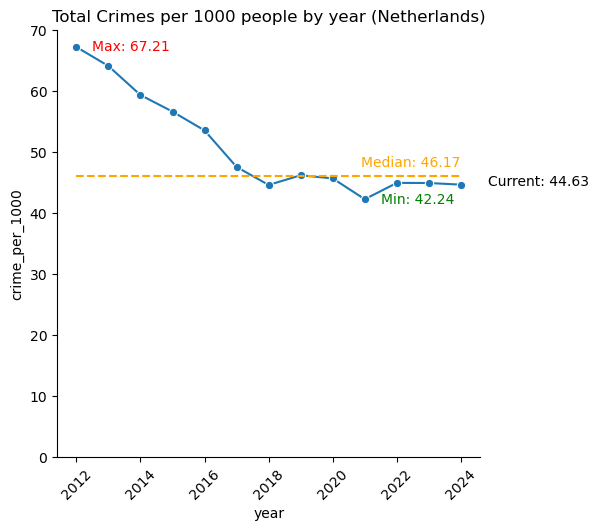

In [90]:
# Plot country-wide total crime per 1000
sns.relplot(
    data=total_crimes_df,
    x='year',
    y='crime_per_1000',
    marker='o',
    kind='line'
)

## Add median line
median_val = total_crimes_df['crime_per_1000'].median()
plt.hlines(y=round(median_val), xmin=2012, xmax=2024, colors='orange', linestyles='dashed', label='Median crime per 1000')

# Annotate min, max, median and current crime per 1000 values
min_val = total_crimes_df['crime_per_1000'].min()
max_val = total_crimes_df['crime_per_1000'].max()
current_val = total_crimes_df[total_crimes_df['year'] == 2024]['crime_per_1000'].values[0]
print(current_val)
plt.text(
    x=total_crimes_df[total_crimes_df['crime_per_1000'] == min_val]['year'] + 0.5,  # Slightly offset for readability
    y=min_val,
    s=f'Min: {min_val:.2f}',
    ha='left',
    va='center',
    color='green'
)
plt.text(
    x= total_crimes_df[total_crimes_df['crime_per_1000'] == max_val]['year'] + 0.5,  # Slightly offset for readability
    y=max_val,
    s=f'Max: {max_val:.2f}',
    ha='left',
    va='center',
    color='red'
)
plt.text(
    x=2024,  # Place at the end of the x-axis
    y=median_val + 2, ## offset for readabililty
    s=f'Median: {median_val:.2f}',
    ha='right',
    va='center',
    color='orange'
)
plt.text(
    x=2028,  # Place at the end of the x-axis
    y=current_val + 0.5, ## offset for readabililty
    s=f'Current: {current_val:.2f}',
    ha='right',
    va='center',
    color='black'
)

plt.title('Total Crimes per 1000 people by year (Netherlands)')
plt.xticks(rotation=45)
plt.ylim(0,70)
plt.show()


In [43]:
# Find the 10 cities with the highest crime in 2024 and in 2012
gemeenten_compare = gemeenten_df[(gemeenten_df['crime_type'] == 'Totaal misdrijven') & 
((gemeenten_df['year'] == 2024) | (gemeenten_df['year'] == 2012)) ].sort_values(
    by=['crime_per_1000'], ascending=False)
gemeenten_compare.head(20)

,id,crime_type,region,year,crime_count,population,crime_per_1000
351,6312,Totaal misdrijven,Amsterdam,2012,100348,799278,125.55
2808,47712,Totaal misdrijven,Schagen,2012,2203,18566,118.66
1092,18552,Totaal misdrijven,Eindhoven,2012,25607,218433,117.23
2080,35112,Totaal misdrijven,Maastricht,2012,14190,121819,116.48
2769,47172,Totaal misdrijven,Rotterdam,2012,68146,616294,110.57
1300,22152,Totaal misdrijven,'s-Gravenhage (gemeente),2012,52689,505856,104.16
2496,43032,Totaal misdrijven,Ouder-Amstel,2012,1342,13249,101.29
2249,38532,Totaal misdrijven,Nijmegen,2012,16833,166382,101.17
377,6672,Totaal misdrijven,Arnhem,2012,14891,149827,99.39
2730,46632,Totaal misdrijven,Roermond,2012,5612,56690,98.99


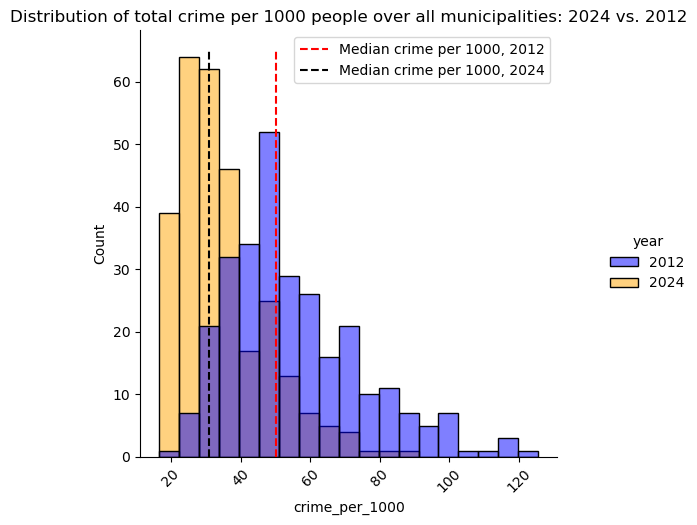

In [189]:
# Histogram of distribution of total crime figures per gemeente in 2024 and 2012
sns.displot(data=gemeenten_compare, x='crime_per_1000', hue='year', kind="hist", palette=['blue','orange'])

## Create median lines for each year's distribution
plt.vlines(x=gemeenten_compare[gemeenten_compare['year']==2012]['crime_per_1000'].median(), ymin=0, ymax=65, 
           colors='red', linestyles='dashed', label='Median crime per 1000, 2012')
plt.vlines(x=gemeenten_compare[gemeenten_compare['year']==2024]['crime_per_1000'].median(), ymin=0, ymax=65, 
           colors='black', linestyles='dashed', label='Median crime per 1000, 2024')

plt.legend()

plt.title('Distribution of total crime per 1000 people over all municipalities: 2024 vs. 2012')
plt.xticks(rotation=45)
plt.show()

## Top cities for total crime

### Over time

In [190]:
# Find the top 20 cities with the highest overall average crime per 1000 people over time
gemeenten_totals = gemeenten_df[gemeenten_df['crime_type'] == 'Totaal misdrijven']

top20_gemeenten = gemeenten_totals[['region','crime_per_1000']].groupby(by=['region']).mean().sort_values(
    by=['crime_per_1000'], axis=0, ascending=False).head(20)
top20_gemeenten.rename(columns={'crime_per_1000':'Avg. crime per 1000; 2012-2024'}, inplace=True)
## How can I rename the column to make clear they are averaged values??

top20_gemeenten

,Avg. crime per 1000; 2012-2024
region,
Amsterdam,99.143077
Rotterdam,87.591538
Eindhoven,85.519231
Utrecht (gemeente),79.039231
Maastricht,77.980000
's-Gravenhage (gemeente),76.937692
Arnhem,75.890769
Roermond,75.713846
Ouder-Amstel,73.721538


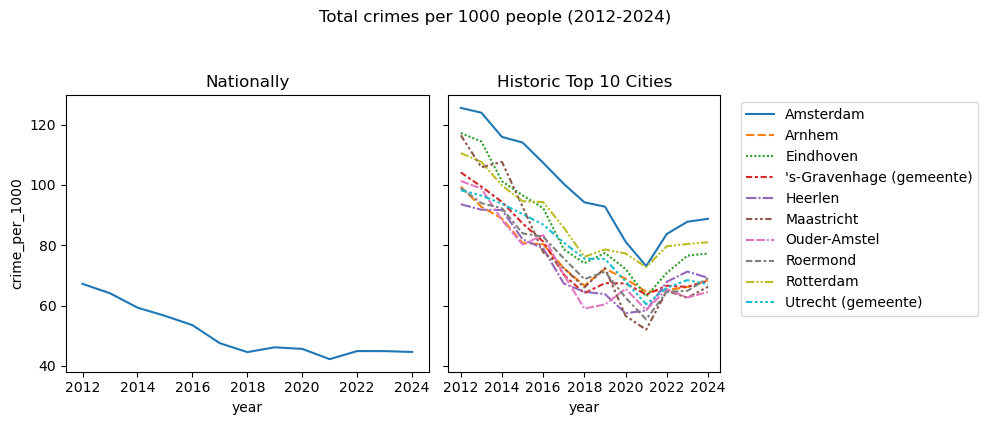

In [221]:
##Plot national & city trends from 2012 - 2024

## Subset top 10 cities in terms of historic average total crime rates per 1000 people
top10_gemeenten = gemeenten_df[(gemeenten_df['region'].isin(top20_gemeenten.index[:10])) & (gemeenten_df['crime_type']=='Totaal misdrijven')]

## Set figure properties
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 3]), sharey=True, sharex=True)


## Plot full timeline country level
sns.lineplot(data=total_crimes_df, 
             x='year', y='crime_per_1000', 
             # hue='region', style='region', 
             ax=axs[0],
            legend=False)

## Plot full timeline top 100 gemeenten
sns.lineplot(data=top10_gemeenten, 
             x='year', y='crime_per_1000', 
             hue='region', style='region', 
             ax=axs[1])

# Set titles
f.suptitle('Total crimes per 1000 people (2012-2024)', y=1.05)
axs[0].set_title('Nationally')
axs[1].set_title('Historic Top 10 Cities')

# Move legend outside plots
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

f.tight_layout()

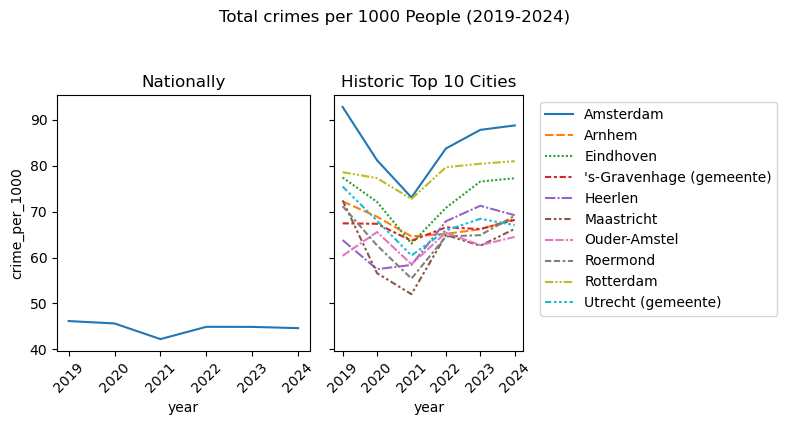

In [219]:
## Plot national & city trends from 2019-2024
## !! Change this to range to be more pythonic !!
last5_boolmask = [2019, 2020, 2021, 2022, 2023, 2024]

## Set figure properties
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]), sharex=True, sharey=True)

## Plot country wide total crime 2019-2024
sns.lineplot(data=total_crimes_df[total_crimes_df['year'].isin(last5_boolmask)], 
             x='year', y='crime_per_1000', 
             # hue='region', style='region', 
             ax=axs[0],
            legend=False)


## Plot top 10 gemeenten 2019-2024
sns.lineplot(data=top10_gemeenten[top10_gemeenten['year'].isin(last5_boolmask)], 
             x='year', y='crime_per_1000', 
             hue='region', style='region', 
             ax=axs[1])

# Set titles
f.suptitle('Total crimes per 1000 People (2019-2024)', y=1.05)
axs[0].set_title('Nationally')
axs[1].set_title('Historic Top 10 Cities')

## Rotate all x tick labels
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Move legend outside plots
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

f.tight_layout()

In [214]:
## Create table with percentage changes in total crime for whole country + selected 10 cities over differnt time periods

## Define function to calculate percentage change for 2012-2024 and 2019-2024
def percent_change(group):
    calc2012 = group[group['year'] == 2012]['crime_per_1000'].values[0]
    calc2019 = group[group['year'] == 2019]['crime_per_1000'].values[0]
    calc2024 = group[group['year'] == 2024]['crime_per_1000'].values[0]

    ## New column for change 2012-2024
    pct_change_full = round((calc2024 - calc2012) / calc2012 * 100, 2)
    ## New column for change 2019-2024
    pct_change_recent = round((calc2024 - calc2019) / calc2019 * 100, 2)

    return pd.Series({
        'pct_change_full': pct_change_full,
        'pct_change_recent': pct_change_recent
    })

## Apply the function to national data
country_pctchange = (
    total_crimes_df[['region', 'year', 'crime_per_1000']]
    .sort_values(by='year')
    .groupby('region')
    .apply(percent_change)
    .reset_index()
)

## Apply function to historic top 10 gemeenten data
top10_pctchange = (
    top10_gemeenten[['region', 'year', 'crime_per_1000']]
    .sort_values(by='year')
    .groupby('region')
    .apply(percent_change)
    .reset_index()
)

## Concat both into new dataframe
compare_pctchange = pd.concat([country_pctchange, top10_pctchange], axis=0).sort_values(by='pct_change_recent', ascending=False)
compare_pctchange

C:\Users\chels\AppData\Local\Temp\ipykernel_23492\1817450248.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(percent_change)
C:\Users\chels\AppData\Local\Temp\ipykernel_23492\1817450248.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(percent_change)


,region,pct_change_full,pct_change_recent
4,Heerlen,-26.05,8.50
6,Ouder-Amstel,-36.34,6.77
8,Rotterdam,-26.75,3.04
0,'s-Gravenhage (gemeente),-34.52,1.11
3,Eindhoven,-34.08,-0.19
7,Roermond,-30.18,-2.96
0,Nederland,-33.60,-3.34
1,Amsterdam,-29.30,-4.34
2,Arnhem,-31.20,-5.33
5,Maastricht,-43.12,-8.56


### In 2024

In [47]:
## Subset top 10 cities for total crime in 2024
top10_2024 = gemeenten_compare[gemeenten_compare['year']==2024].sort_values(by=['crime_per_1000'], ascending=False).head(10)
top10_2024

,id,crime_type,region,year,crime_count,population,crime_per_1000
363,6468,Totaal misdrijven,Amsterdam,2024,82955,934526,88.77
2781,47328,Totaal misdrijven,Rotterdam,2024,54503,672960,80.99
1104,18708,Totaal misdrijven,Eindhoven,2024,19246,249035,77.28
2846,48228,Totaal misdrijven,Schiedam,2024,5701,82232,69.33
1520,25188,Totaal misdrijven,Heerlen,2024,6058,87522,69.22
2742,46788,Totaal misdrijven,Roermond,2024,4230,61210,69.11
389,6828,Totaal misdrijven,Arnhem,2024,11581,169364,68.38
1312,22308,Totaal misdrijven,'s-Gravenhage (gemeente),2024,38802,568945,68.20
3210,54348,Totaal misdrijven,Utrecht (gemeente),2024,25265,376757,67.06
2092,35268,Totaal misdrijven,Maastricht,2024,8318,125563,66.25


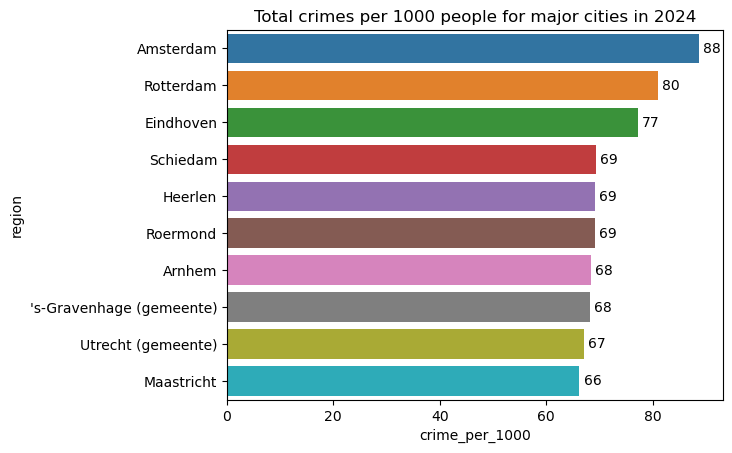

In [187]:
## Plot bar chart for top 10 cities in 2024
ax = sns.barplot(data=top10_2024,
            x='crime_per_1000',
            y='region',
            hue='region')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Total crimes per 1000 people for major cities in 2024')
plt.show()

## City group comparison

### Over time

In [194]:
## Table of average crime per 1000 in each year per city grouping
bvr_groups = gemeenten_df[(gemeenten_df['crime_type'] == 'Totaal misdrijven') &
((gemeenten_df['region'].isin(brabant_cities))|(gemeenten_df['region'].isin(randstad_cities)))]

bvr_groups['city_group'] = np.where(
    bvr_groups['region'].isin(brabant_cities), 'Brabant',
    np.where(bvr_groups['region'].isin(randstad_cities), 'Randstad', None)
)

bvr_grouped = bvr_groups[['city_group','year','crime_per_1000']].groupby(by=['city_group', 'year']).mean()
round(bvr_grouped,2)

C:\Users\chels\AppData\Local\Temp\ipykernel_23492\3529296827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bvr_groups['city_group'] = np.where(


crime_per_1000
city_group year                
Brabant    2012           97.29
           2013           92.79
           2014           84.72
           2015           80.00
           2016           74.37
           2017           66.34
           2018           61.90
           2019           63.86
           2020           61.96
           2021           56.89
           2022           61.56
           2023           62.90
           2024           61.43
Randstad   2012          109.64
           2013          106.88
           2014          100.96
           2015           96.56
           2016           92.43
           2017           84.32
           2018           77.52
           2019           78.58
           2020           73.46
           2021           67.49
           2022           73.97
           2023           75.72
           2024           76.26

C:\Users\chels\AppData\Local\Temp\ipykernel_23492\2198048616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bvr_groups['city_group'] = np.where(


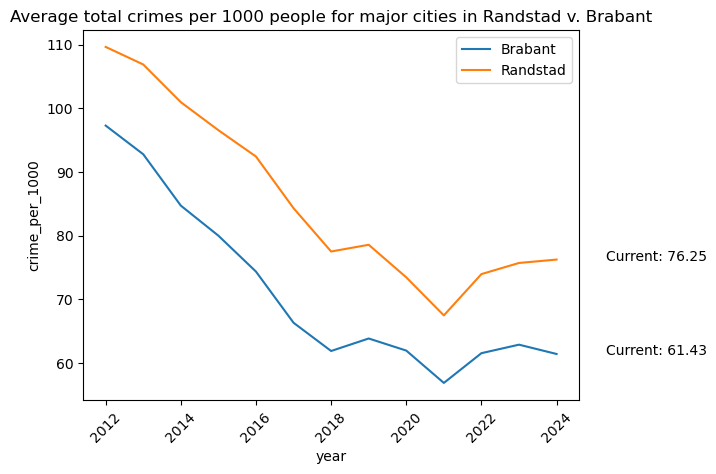

In [174]:
## Line chart of the average of total crime for each city group (Brabant vs. Randstad) over time
sns.lineplot(data=bvr_grouped,
           x='year',
           y='crime_per_1000',
           hue='city_group')

current_randstad = bvr_grouped.loc[('Randstad', 2024)].values[0]
current_brabant = bvr_grouped.loc[('Brabant', 2024)].values[0]

plt.text(
    x=2028,  # Place at the end of the x-axis
    y=current_randstad + 0.5, ## offset for readabililty
    s=f'Current: {current_randstad:.2f}',
    ha='right',
    va='center',
    color='black'
)

plt.text(
    x=2028,  # Place at the end of the x-axis
    y=current_brabant + 0.5, ## offset for readabililty
    s=f'Current: {current_brabant:.2f}',
    ha='right',
    va='center',
    color='black'
)

plt.title('Average total crimes per 1000 people for major cities in Randstad v. Brabant')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


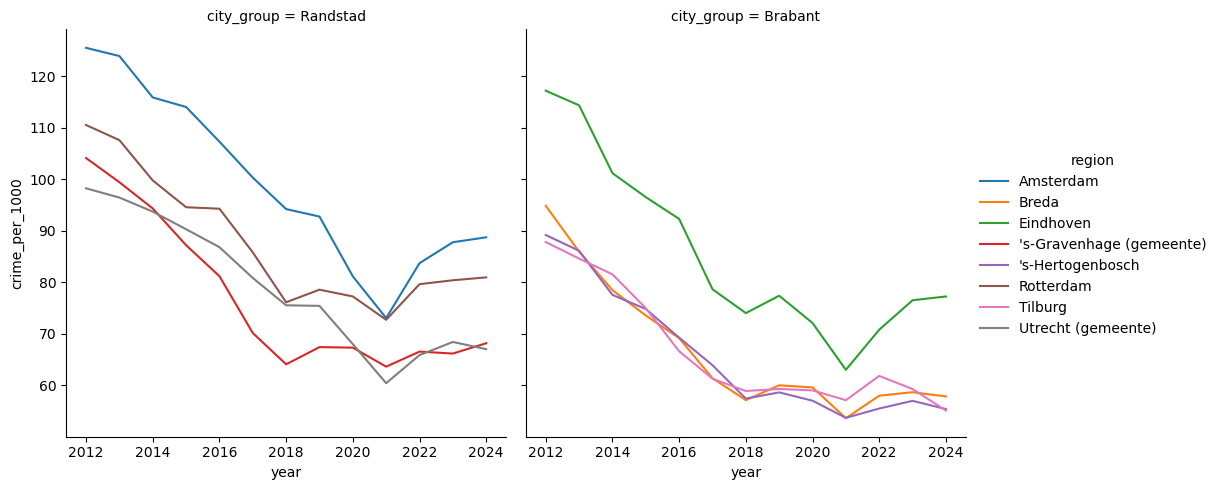

In [185]:
g = sns.relplot(data=bvr_groups, x="year", y="crime_per_1000", hue='region', col="city_group", kind='line')
g.set_axis_labels('year', 'crime_per_1000')

### !! ADD HERE
- Need to add table showing percentage changes, similar to previous one

In [ ]:
## Table of percent change in total crime for each city, from 2012-2024 and from 2019-2024, compared to national

### In 2024

In [192]:
## Table of 2024 values for each city per group
bvrgroups_2024 = bvr_groups[bvr_groups['year'] == 2024]

bvrgroups_2024.sort_values(by=['crime_per_1000'], ascending=False)

,id,crime_type,region,year,crime_count,population,crime_per_1000,city_group
363,6468,Totaal misdrijven,Amsterdam,2024,82955,934526,88.77,Randstad
2781,47328,Totaal misdrijven,Rotterdam,2024,54503,672960,80.99,Randstad
1104,18708,Totaal misdrijven,Eindhoven,2024,19246,249035,77.28,Brabant
1312,22308,Totaal misdrijven,'s-Gravenhage (gemeente),2024,38802,568945,68.20,Randstad
3210,54348,Totaal misdrijven,Utrecht (gemeente),2024,25265,376757,67.06,Randstad
727,12228,Totaal misdrijven,Breda,2024,10927,188779,57.88,Brabant
1624,26628,Totaal misdrijven,'s-Hertogenbosch,2024,8954,161530,55.43,Brabant
3119,52908,Totaal misdrijven,Tilburg,2024,12701,230357,55.14,Brabant


### !! REVISE HERE
- Need to fix labels so all are legible

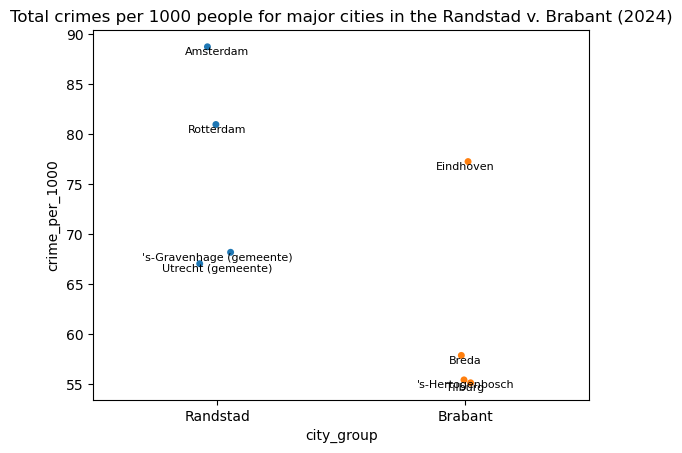

In [177]:
## Strip plot comparing total crime per city in each group for 2024
ax = sns.stripplot(data=bvrgroups_2024,
            x='city_group',
            y='crime_per_1000',
            hue='city_group',
                  jitter=True)

## Create city name labels for each point
for i, row in bvrgroups_2024.iterrows():
    ax.text(
        x=row['city_group'],  # x position (categorical, so use the category directly)
        y=row['crime_per_1000'],  # y position
        s=row['region'],  # Label from the 'time' column (replace with 'region' for your data)
        ha="center",
        va="top",
        fontsize=8)

plt.title('Total crimes per 1000 people for major cities in the Randstad v. Brabant (2024)')
plt.show()

## Regional comparison

In [49]:
plot_regions = regions_df[regions_df['crime_type']=='Totaal misdrijven']
plot_regions

,id,crime_type,region,year,crime_count,population,crime_per_1000
13,1272,Totaal misdrijven,Groningen (PV),2012,35220,581705,60.55
14,1285,Totaal misdrijven,Groningen (PV),2013,33755,582728,57.93
15,1298,Totaal misdrijven,Groningen (PV),2014,30162,583942,51.65
16,1311,Totaal misdrijven,Groningen (PV),2015,29796,583721,51.04
17,1324,Totaal misdrijven,Groningen (PV),2016,29291,583581,50.19
...,...,...,...,...,...,...,...
164,3356,Totaal misdrijven,Limburg (PV),2020,50371,1115872,45.14
165,3369,Totaal misdrijven,Limburg (PV),2021,47907,1118302,42.84
166,3382,Totaal misdrijven,Limburg (PV),2022,52765,1128367,46.76
167,3395,Totaal misdrijven,Limburg (PV),2023,52426,1133255,46.26


### !! CHANGE COLOR SCHEME
- Need to choose a color scheme that is more easily discernible

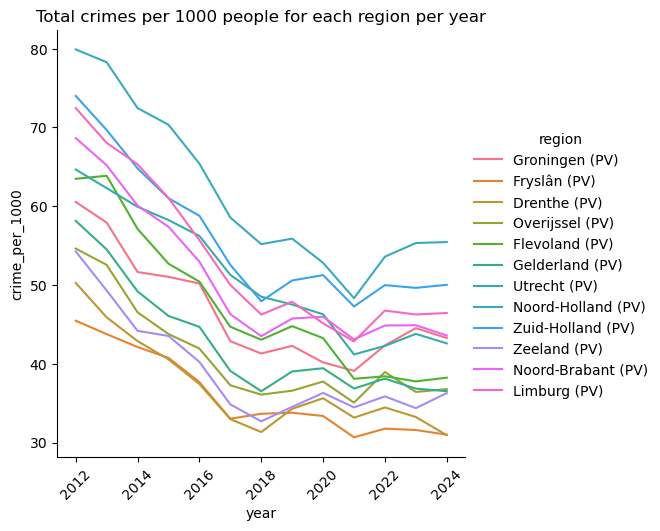

In [116]:
# Line chart of each region (PV) figures over time
sns.relplot(
    data=plot_regions,
    x='year',
    y='crime_per_1000',
    hue='region',
    # style='region',
    # marker='o',
    kind='line'
)

plt.title('Total crimes per 1000 people for each region per year')
plt.xticks(rotation=45)
plt.show()


In [152]:
## Percent change in total crime for each region between 2012 and 2024
# Define a custom function to calculate percent change
def percent_change(group):
    first = group.iloc[0]['crime_per_1000']
    last = group.iloc[-1]['crime_per_1000']
    return round((last - first) / first * 100,2)

# Group by region, sort by year, and apply the function
result = (
    plot_regions[['region', 'year', 'crime_per_1000']]
    .sort_values('year')
    .groupby('region')  
    .apply(percent_change)
    .reset_index(name='percent_change')
)

result


C:\Users\chels\AppData\Local\Temp\ipykernel_23492\1631343485.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(percent_change)


,region,percent_change
0,Drenthe (PV),-38.45
1,Flevoland (PV),-39.76
2,Fryslân (PV),-31.82
3,Gelderland (PV),-37.18
4,Groningen (PV),-28.52
5,Limburg (PV),-35.90
6,Noord-Brabant (PV),-36.50
7,Noord-Holland (PV),-30.60
8,Overijssel (PV),-32.66
9,Utrecht (PV),-34.13


### !! ADD HERE
- Still need to add Datawrapper visualisations

In [51]:
## !! Insert map viz from Datawrapper here for regional 2024 total crime values and percent change values 2012 - 2024

# Violent crime over time

In [142]:
## Subset & group original dataframe for violent crimes by region and year
## !! Need to recalculate crime_per_1000 figures to include violent crime only !!
violent_df = merged_df[merged_df['crime_type'].isin(violent_crime)]
violent_df = violent_df[['region','year','crime_type','crime_count']].groupby(by=['region','year']).sum()
violent_df = violent_df.drop('crime_type', axis=1).rename(columns={'crime_count':'violent_crime_count'})
violent_df

violent_crime_count
region                   year                     
's-Gravenhage (gemeente) 2012                 6525
                         2013                 6337
                         2014                 5974
                         2015                 5344
                         2016                 5065
...                                            ...
Zwolle                   2020                  777
                         2021                  840
                         2022                  858
                         2023                  801
                         2024                  864

[3873 rows x 1 columns]

## National violent crime over time

In [56]:
## Plot line chart of national violent crime rate 2012-2024

sns.replot(data=violent_df,
           x='year',
           y='crime_per_1000',
           hue='region'

_IncompleteInputError: incomplete input (1071394836.py, line 6)

## Top cities for violent crime over time

In [ ]:
## Calculate top 10 cities by historic average violent crime rates

In [ ]:
## Plot line chart

## Top cities for violent crime (2024)

## Top violent crime type per city (2024)

# Correlations

In [223]:
## Total crime vs. population (2024 levels); top 30 municipalities

In [224]:
## Violent crime vs. population (2024 levels); top 30 municipalities